In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 4

In [14]:
# initial conditions
y0 = 1.0
h = 0.5


# y' = f(y)
def f(y):
    return -5 * y

Przekształcenie metody niejawnej:

$ y_{k+1} = y_k + h_k f(t_{k+1}, y_{k+1})$

$ y_{k+1} = y_k - 5 * 0.5 y_{k+1} $

$ y_{k+1} = \dfrac{2y_k}{7}$

In [15]:
# explicit method
def euler_explicit(yk, hk, f):
    return yk + hk * f(yk)

# transformed implicit method
def euler_implicit(yk):
    return 2. / 7. * yk


In [16]:
START = 1
END = 10

# number of iterations
n = round((END - START) / h)

result_explicit = np.empty(n+1, dtype=np.double)
result_implicit = np.empty(n+1, dtype=np.double)

result_explicit[0] = y0
result_implicit[0] = y0


for i in range(n):
    result_explicit[i+1] = euler_explicit(result_explicit[i], h, f)
    result_implicit[i+1] = euler_implicit(result_implicit[i])


#analytic solution
def y(x):
    return np.exp(-5 * x)

### Sprawdzenie wyników dla t = 0.5

In [17]:
print(f"Actual: {y(0.5)}")
print(f"Euler explicit: {result_explicit[1]}")
print(f"Euler implicit: {result_implicit[1]}")

Actual: 0.0820849986238988
Euler explicit: -1.5
Euler implicit: 0.2857142857142857


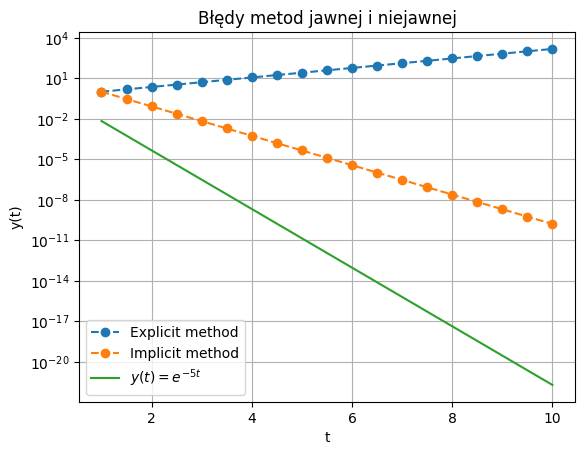

[ 1.00000000e+00 -1.50000000e+00  2.25000000e+00 -3.37500000e+00
  5.06250000e+00 -7.59375000e+00  1.13906250e+01 -1.70859375e+01
  2.56289062e+01 -3.84433594e+01  5.76650391e+01 -8.64975586e+01
  1.29746338e+02 -1.94619507e+02  2.91929260e+02 -4.37893890e+02
  6.56840836e+02 -9.85261253e+02  1.47789188e+03]


In [27]:
xs = np.linspace(START, END, n + 1)
plt.plot(xs, abs(result_explicit), label="Explicit method", ls="--", marker="o")
plt.plot(xs, result_implicit, label="Implicit method", ls="--", marker="o")
plt.semilogy(xs, y(xs), label = r'$y(t) = e^{-5t}$')
plt.legend()
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Błędy metod jawnej i niejawnej")
plt.grid(True)
plt.show()
print(result_explicit)

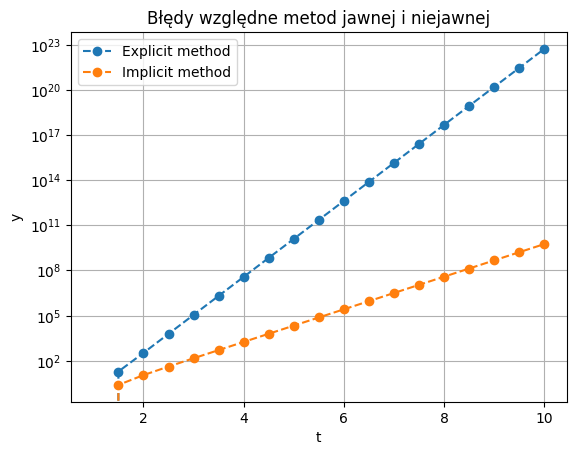

In [30]:
def relative_err(res, val): 
    return np.abs(val - res) / val

relative_err_explicit = [relative_err(result_explicit[i], y(i * h)) for i in range(n + 1)]
relative_err_implicit = [relative_err(result_implicit[i], y(i * h)) for i in range(n + 1)]


plt.yscale("log")
plt.plot(xs, relative_err_explicit, label = "Explicit method", ls="--", marker="o")
plt.plot(xs, relative_err_implicit, label = "Implicit method", ls="--", marker="o")
plt.xlabel('t')
plt.ylabel('y')
plt.title("Błędy względne metod jawnej i niejawnej")
plt.legend()
plt.grid(True)